### Exploratory Data Analysis (EDA) and Imputation of Top 50 Countries with the Least Missing Data

This code curates high-quality economic data for machine learning analysis by:

- Selecting the best 50 countries based on data completeness for three key variables: GDP growth, tax revenue, and income inequality ('Gini_index', 'GDP_growth', 'Tax_revenue_percent_GDP')
- Exploring the data through statistical summaries, correlation analysis, and time trend visualizations
- Assessing data quality by identifying missing values and patterns
- Preparing a clean dataset ready for the machine learning models used in this fiscal policy research

It transforms World Bank data into a reliable, analysis-ready dataset of the 50 countries with the most complete economic information, ensuring your subsequent machine learning predictions are based on solid evidence rather than incomplete data.

Top 50 countries with most intact data for key indicators:
                Country  non_missing_total
51           Costa Rica                 32
29               Brazil                 31
238            Thailand                 31
252       United States                 31
191            Paraguay                 31
11              Armenia                 31
47             Colombia                 31
254             Uruguay                 31
87              Georgia                 31
61   Dominican Republic                 31
222               Spain                 30
56               Cyprus                 30
194              Poland                 30
244             Turkiye                 30
32             Bulgaria                 30
83               France                 30
129     Kyrgyz Republic                 30
81              Finland                 30
135              Latvia                 30
146          Luxembourg                 30
153               Malta               

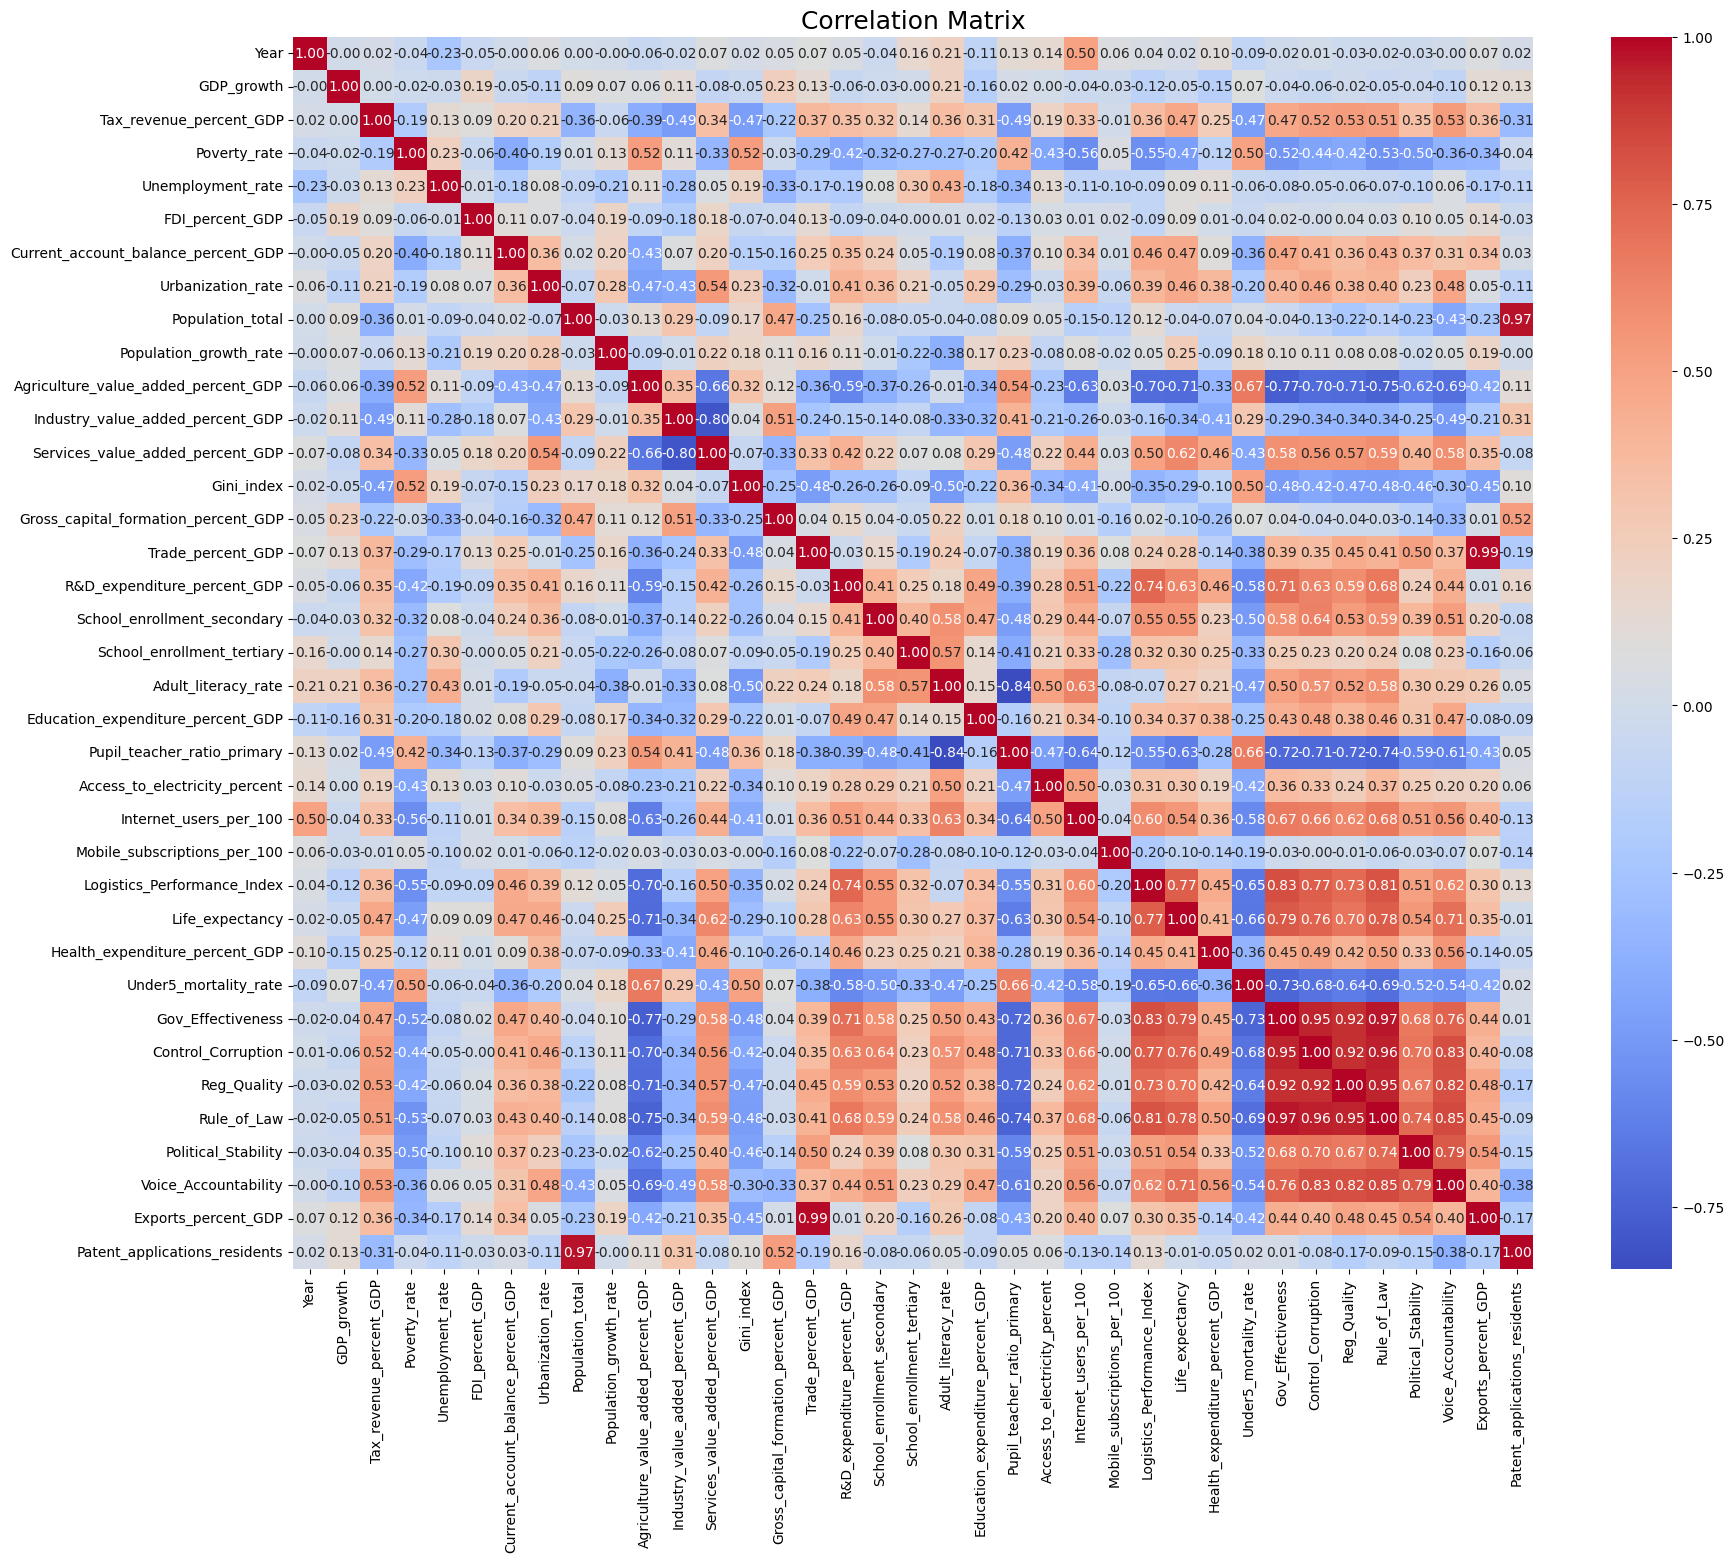

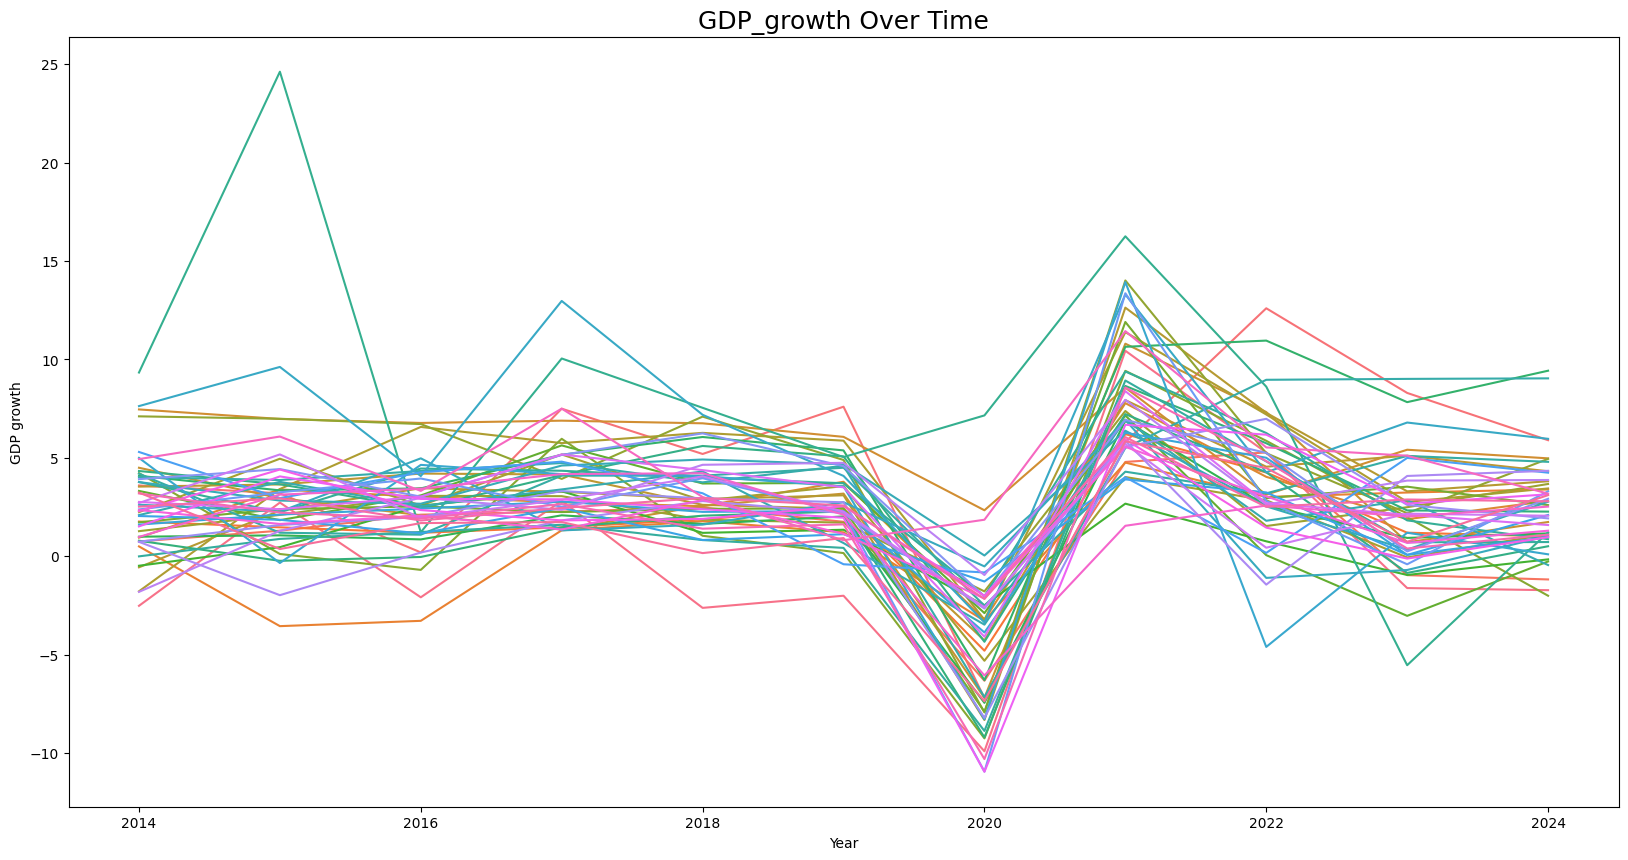

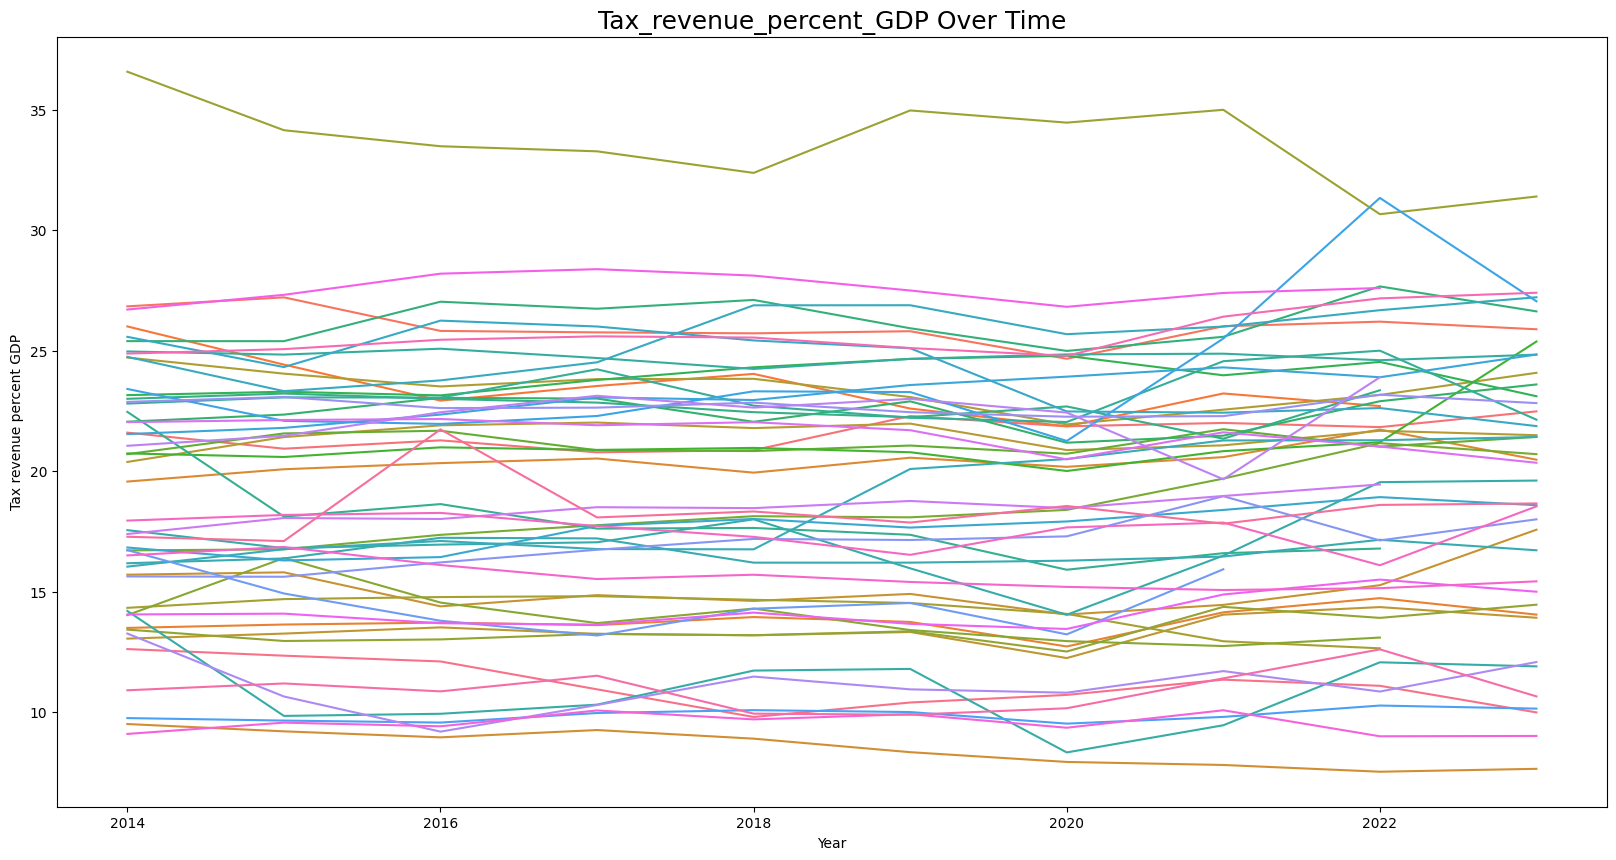

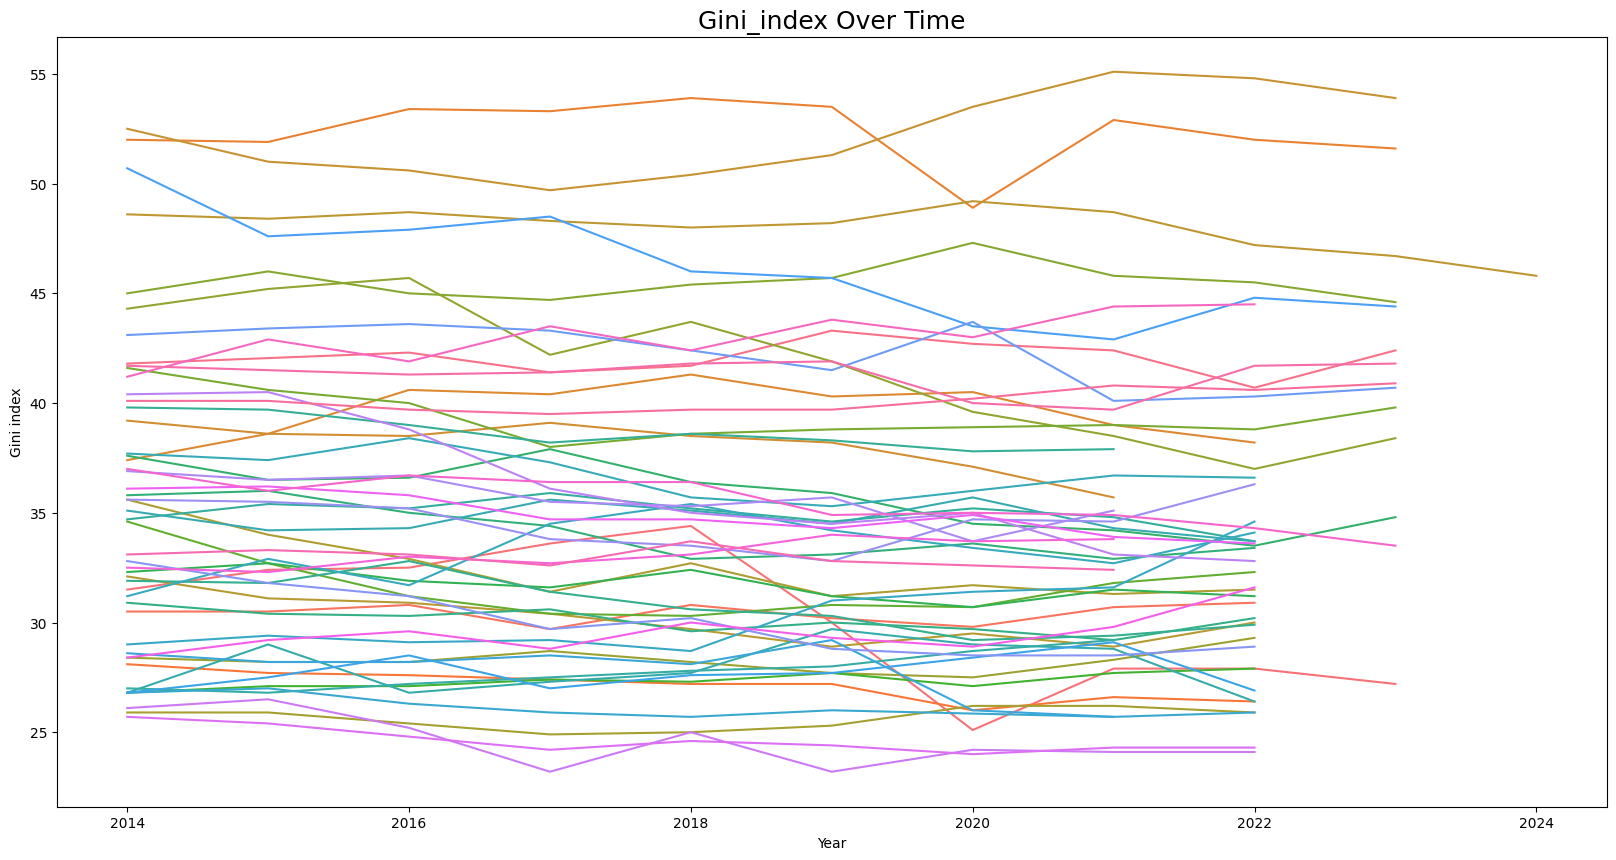

<Figure size 2000x1000 with 0 Axes>

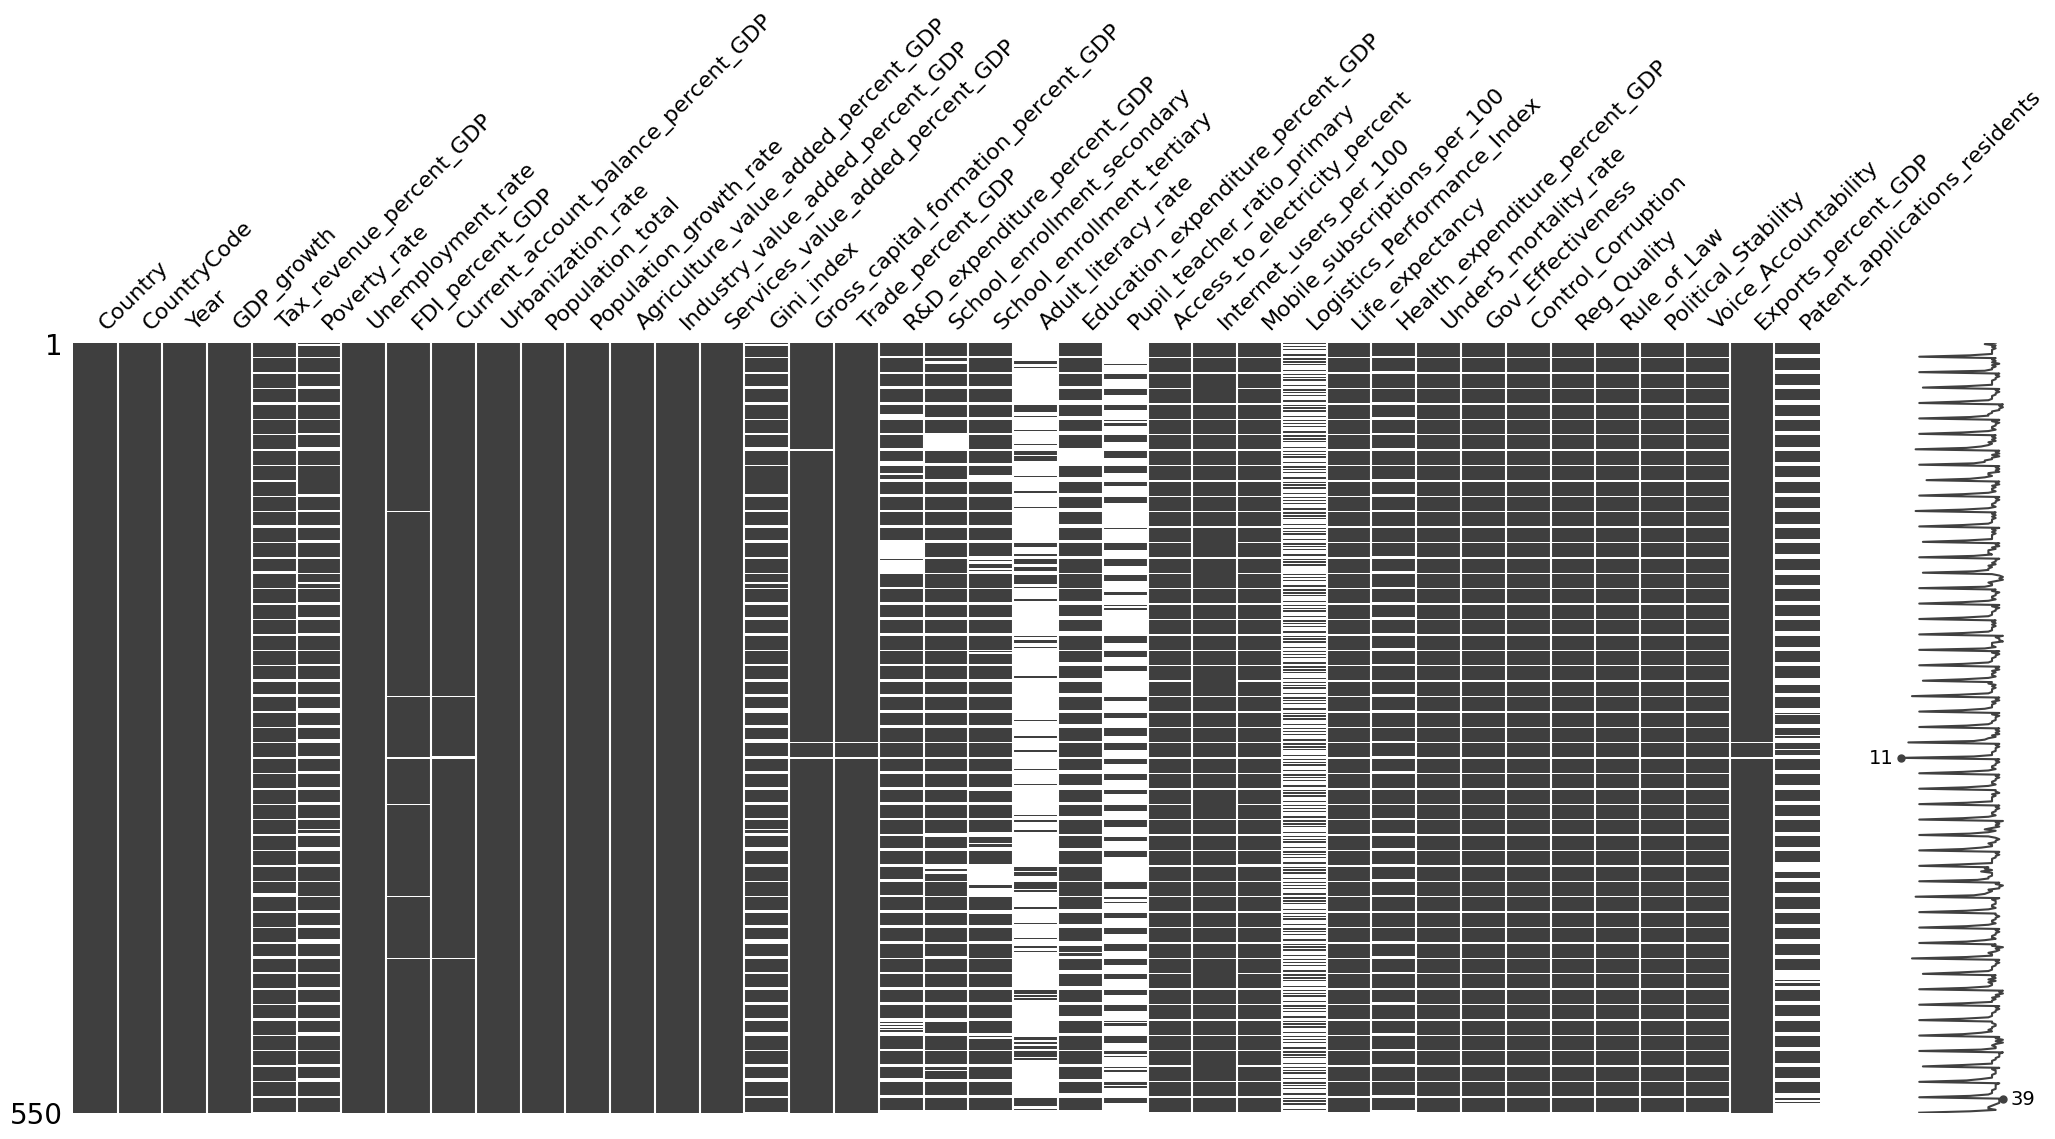

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor


# Load full dataset
df = pd.read_csv('world_bank_data_2014_2024.csv', low_memory=False)

# Define key indicators for completeness filtering
key_vars = ['Gini_index', 'GDP_growth', 'Tax_revenue_percent_GDP']

# Rank countries by non-missing counts across key indicators
completeness = (
    df.groupby('Country')[key_vars]
    .apply(lambda x: x.notnull().sum())
    .sum(axis=1)
    .reset_index(name='non_missing_total')
)

top_50_countries = completeness.sort_values(by='non_missing_total', ascending=False).head(50)
df_top_50 = df[df['Country'].isin(top_50_countries['Country'])]

print("Top 50 countries with most intact data for key indicators:")
print(top_50_countries)

# Auto-detect key dimensions
year_col = [col for col in df_top_50.columns if 'year' in col.lower()][0]
country_col = [col for col in df_top_50.columns if 'country' in col.lower()][0]

# Basic structure
print("Shape:", df_top_50.shape)
print("Columns:", df_top_50.columns.tolist())
print("Missing values:\n", df_top_50.isnull().sum().sort_values(ascending=False).head(10))

# Summary stats
print("\nDescriptive statistics:\n", df_top_50.describe(include='all'))

# Unique countries and years
print("\nCountries:", df_top_50[country_col].nunique())
print("Years:", df_top_50[year_col].nunique())

# Correlation matrix
numeric_cols = df_top_50.select_dtypes(include=np.number).columns
corr_matrix = df_top_50[numeric_cols].corr()
plt.figure(figsize=(20, 16))  # doubled size
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix", fontsize=18)
plt.show()

# Time trends for key indicators
key_indicators = ['GDP_growth', 'Tax_revenue_percent_GDP', 'Gini_index']
for indicator in key_indicators:
    if indicator in df_top_50.columns:
        plt.figure(figsize=(20, 10))  # doubled size
        sns.lineplot(data=df_top_50, x=year_col, y=indicator, hue=country_col, legend=False)
        plt.title(f"{indicator} Over Time", fontsize=18)
        plt.xlabel("Year")
        plt.ylabel(indicator.replace("_", " "))
        plt.show()

# Missing data pattern (optional)
try:
    import missingno as msno
    plt.figure(figsize=(20, 10))  # doubled size
    msno.matrix(df_top_50)
    plt.show()
except ImportError:
    print("missingno not installed. Run `pip install missingno` to enable missing data visualization.")

# Save to CSV
df_top_50.to_csv('top_50_countries_filtered.csv', index=False)

### Random Forest Imputation

This code fills in missing data using machine learning:

- **Loads** a CSV file with country data
- **Separates** numeric columns (for imputation) from text columns (kept unchanged)
- **Uses Random Forest algorithm** to intelligently predict and fill missing values based on patterns in the data
- **Combines** the filled numeric data with original text columns
- **Saves** the complete dataset as a new CSV file

Instead of simple averaging, it uses machine to make realistic predictions for missing values based on relationships between variables.

In [2]:
# Load your filtered dataset
df = pd.read_csv('top_50_countries_filtered.csv', low_memory=False)

# Preserve non-numeric columns
non_numeric = df.select_dtypes(exclude=np.number)
numeric = df.select_dtypes(include=np.number)

# Initialize Random Forest Imputer
imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=100, random_state=42),
                           max_iter=10, random_state=42)

# Fit and transform numeric data
imputed_array = imputer.fit_transform(numeric)
imputed_numeric = pd.DataFrame(imputed_array, columns=numeric.columns, index=numeric.index)

# Combine with non-numeric columns
df_imputed = pd.concat([non_numeric, imputed_numeric], axis=1)

# Save to CSV
df_imputed.to_csv('top_50_countries_imputed.csv', index=False)

print("Imputation complete. File saved as 'top_50_countries_imputed.csv'")


Imputation complete. File saved as 'top_50_countries_imputed.csv'


### Assessing Random Forest Imputation

Top 50 countries with most intact data for key indicators:
               Country  non_missing_total
0            Argentina                 33
37            Portugal                 33
27              Latvia                 33
28           Lithuania                 33
29          Luxembourg                 33
30               Malta                 33
31             Moldova                 33
32         Netherlands                 33
33              Norway                 33
34            Paraguay                 33
35                Peru                 33
36              Poland                 33
38  Russian Federation                 33
1              Armenia                 33
39              Serbia                 33
40     Slovak Republic                 33
41            Slovenia                 33
42               Spain                 33
43              Sweden                 33
44         Switzerland                 33
45            Thailand                 33
46             Tu

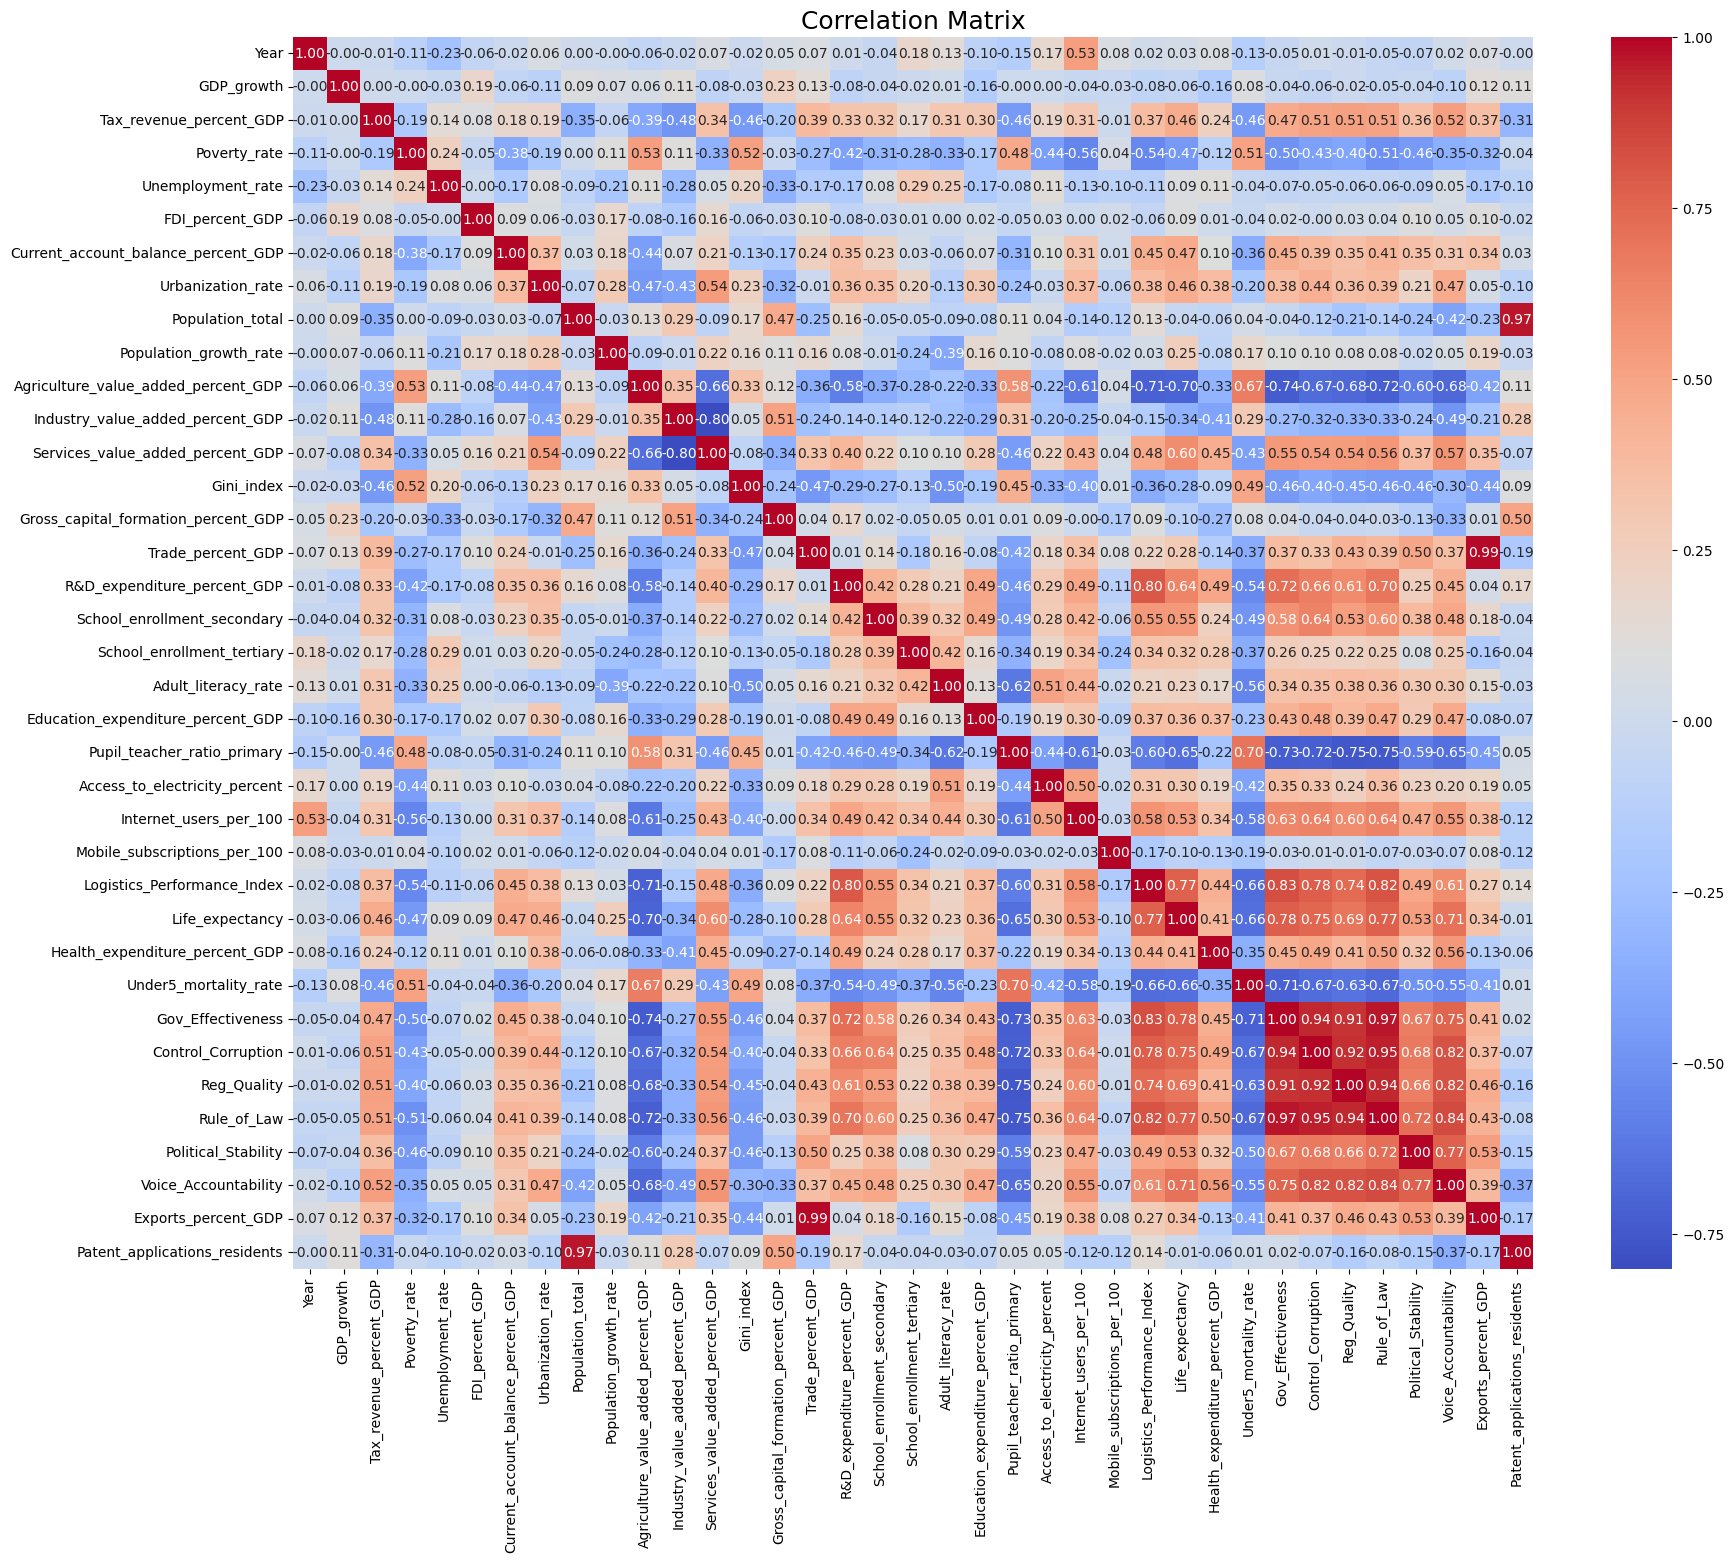

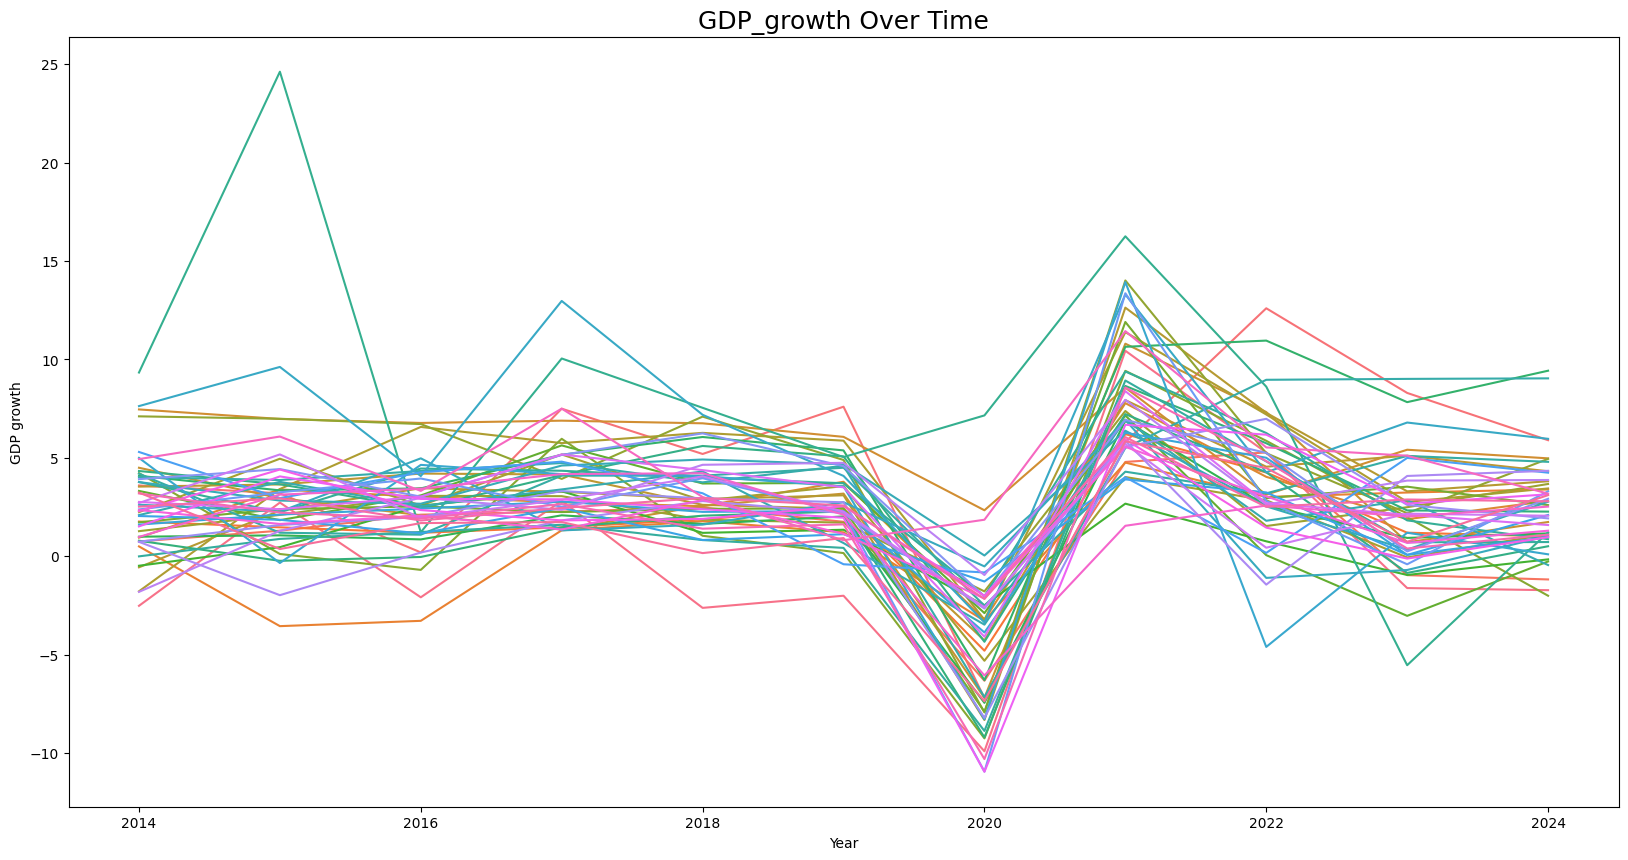

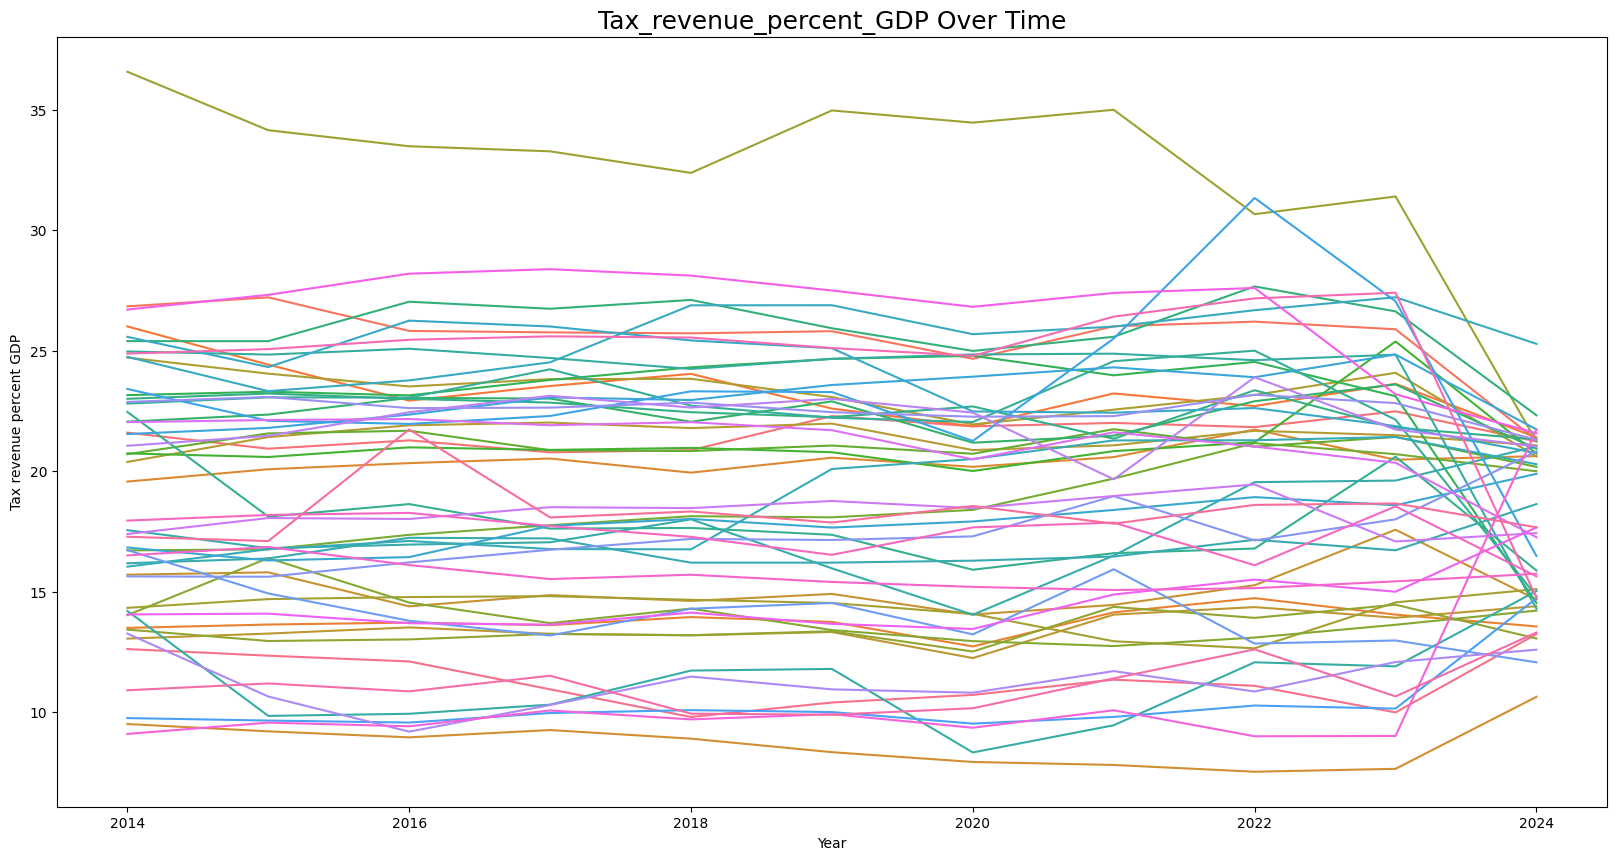

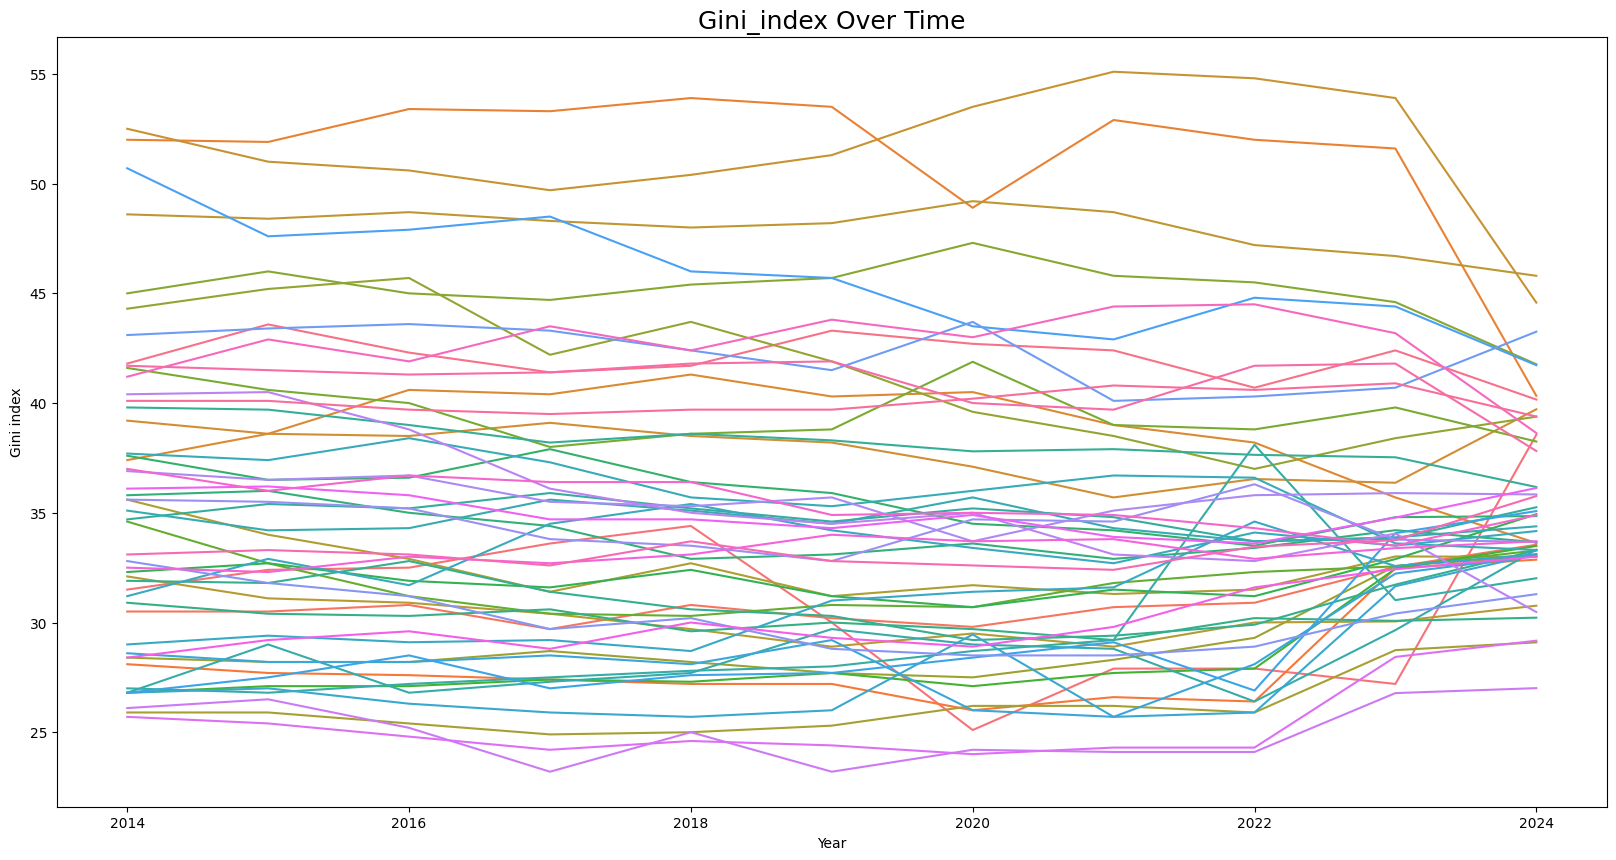

<Figure size 2000x1000 with 0 Axes>

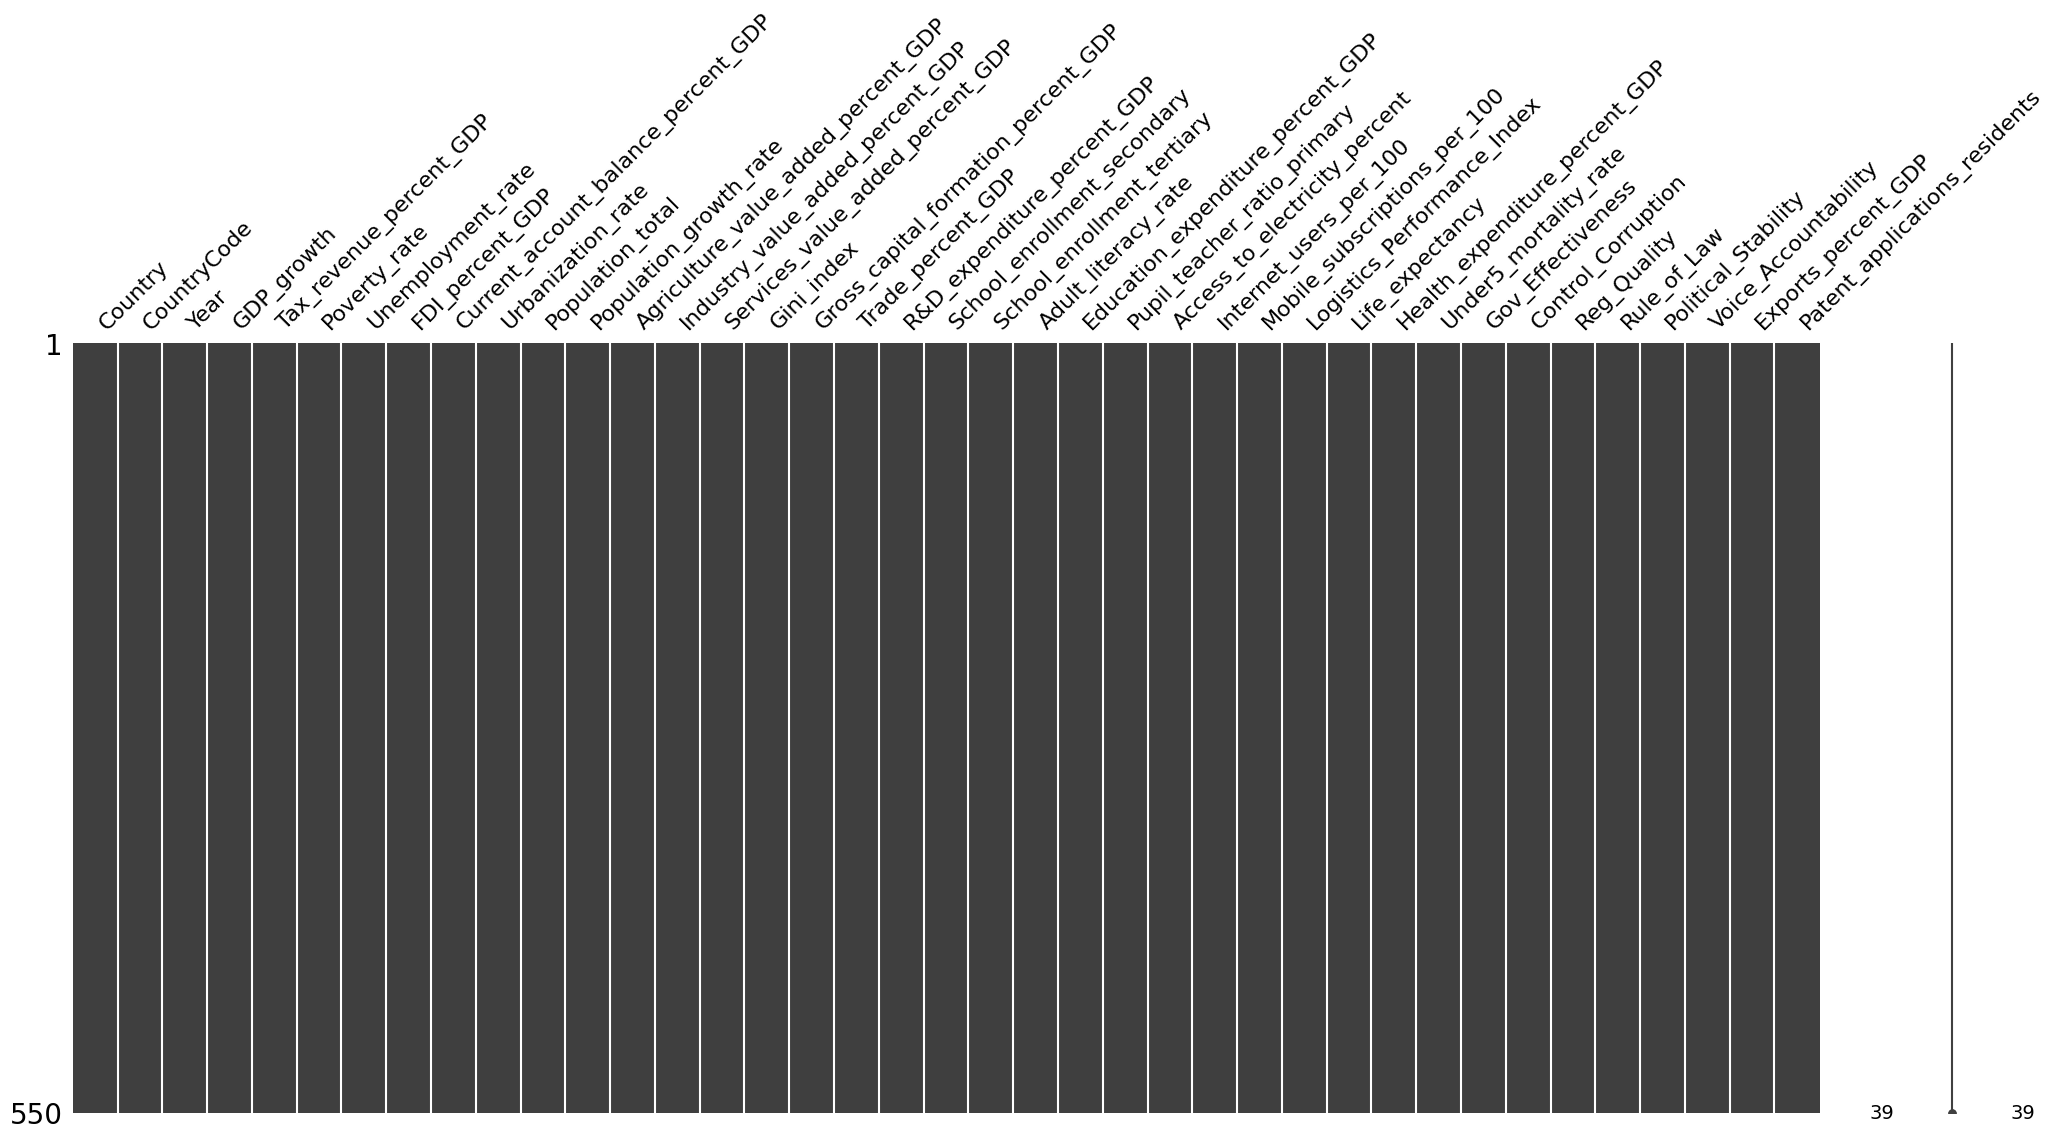

In [17]:
# Load full dataset
df = pd.read_csv('top_50_countries_imputed.csv', low_memory=False)

# Define key indicators for completeness filtering
key_vars = ['Gini_index', 'GDP_growth', 'Tax_revenue_percent_GDP']

# Rank countries by non-missing counts across key indicators
completeness = (
    df.groupby('Country')[key_vars]
    .apply(lambda x: x.notnull().sum())
    .sum(axis=1)
    .reset_index(name='non_missing_total')
)

top_50_countries = completeness.sort_values(by='non_missing_total', ascending=False).head(50)
df_top_50 = df[df['Country'].isin(top_50_countries['Country'])]

print("Top 50 countries with most intact data for key indicators:")
print(top_50_countries)

# Auto-detect key dimensions
year_col = [col for col in df_top_50.columns if 'year' in col.lower()][0]
country_col = [col for col in df_top_50.columns if 'country' in col.lower()][0]

# Basic structure
print("Shape:", df_top_50.shape)
print("Columns:", df_top_50.columns.tolist())
print("Missing values:\n", df_top_50.isnull().sum().sort_values(ascending=False).head(10))

# Summary stats
print("\nDescriptive statistics:\n", df_top_50.describe(include='all'))

# Unique countries and years
print("\nCountries:", df_top_50[country_col].nunique())
print("Years:", df_top_50[year_col].nunique())

# Correlation matrix
numeric_cols = df_top_50.select_dtypes(include=np.number).columns
corr_matrix = df_top_50[numeric_cols].corr()
plt.figure(figsize=(20, 16))  # doubled size
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix", fontsize=18)
plt.show()

# Time trends for key indicators
key_indicators = ['GDP_growth', 'Tax_revenue_percent_GDP', 'Gini_index']
for indicator in key_indicators:
    if indicator in df_top_50.columns:
        plt.figure(figsize=(20, 10))  # doubled size
        sns.lineplot(data=df_top_50, x=year_col, y=indicator, hue=country_col, legend=False)
        plt.title(f"{indicator} Over Time", fontsize=18)
        plt.xlabel("Year")
        plt.ylabel(indicator.replace("_", " "))
        plt.show()

# Missing data pattern (optional)
try:
    import missingno as msno
    plt.figure(figsize=(20, 10))  # doubled size
    msno.matrix(df_top_50)
    plt.show()
except ImportError:
    print("missingno not installed. Run `pip install missingno` to enable missing data visualization.")